In [1]:
# Get the classnames programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path("drive/MyDrive/8th sem project/Detect_solar_dust/Test")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['Clean' 'Dusty']


In [2]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images form here)
  target_folder = target_dir + target_class

  # Get random image path 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")  # shows the shape of image  
  return img

['Imgclean_999_0.jpg']
Image shape: (2048, 946, 3)


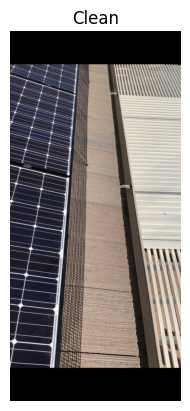

In [3]:
# View random image from the training dataset
img = view_random_image(target_dir="drive/MyDrive/8th sem project/Detect_solar_dust/Train/",
                        target_class="Clean")

In [4]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [5]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(2048, 946, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>

In [6]:
#View image shape
img.shape #returns width, height, colour channels

(2048, 946, 3)

In [7]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "drive/MyDrive/8th sem project/Detect_solar_dust/Train/"
test_dir = "drive/MyDrive/8th sem project/Detect_solar_dust/Test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 2049 images belonging to 2 classes.
Found 513 images belonging to 2 classes.


['Imgclean_408_0.jpg']
Image shape: (590, 629, 3)
['Imgdirty_842_1.jpg']
Image shape: (355, 474, 3)


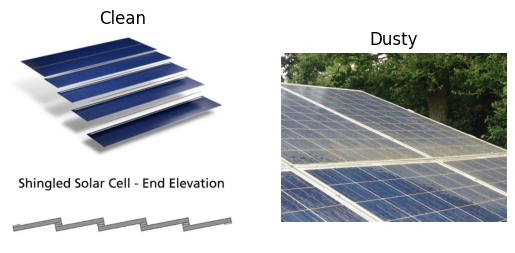

In [9]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
Clean_img = view_random_image("/content/drive/MyDrive/8th sem project/Detect_solar_dust/Train/", "Clean")
plt.subplot(1, 2, 2)
Dusty_img = view_random_image("/content/drive/MyDrive/8th sem project/Detect_solar_dust/Train/", "Dusty")

In [10]:
# Define training and test directory paths
train_dir = "/content/drive/MyDrive/8th sem project/Detect_solar_dust/Train"
test_dir = "/content/drive/MyDrive/8th sem project/Detect_solar_dust/Test"

In [11]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 2049 images belonging to 2 classes.
Found 513 images belonging to 2 classes.


In [13]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [14]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [15]:
# View the first batch of labels
labels

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.],
      dtype=float32)

In [16]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [17]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(65, 17)

In [18]:
# Plot the training curves
import pandas as pd
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [19]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [20]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 2049 images belonging to 2 classes.
Non-augmented training images:
Found 2049 images belonging to 2 classes.
Unchanged test images:
Found 513 images belonging to 2 classes.


In [21]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

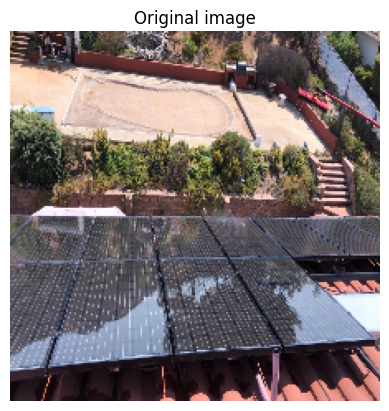

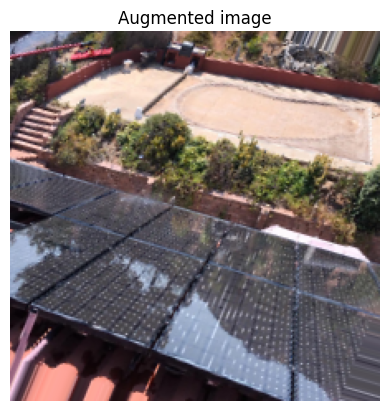

In [22]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [23]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 2049 images belonging to 2 classes.


In [24]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
11/65 [====>.........................] - ETA: 1:24 - loss: 1.0499 - accuracy: 0.4943

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


65/65 [==============================] - 260s 4s/step - loss: 0.7326 - accuracy: 0.5730 - val_loss: 0.6407 - val_accuracy: 0.6023
Epoch 2/5
65/65 [==============================] - 123s 2s/step - loss: 0.6485 - accuracy: 0.6052 - val_loss: 0.6164 - val_accuracy: 0.6491
Epoch 3/5
65/65 [==============================] - 121s 2s/step - loss: 0.6280 - accuracy: 0.6535 - val_loss: 0.6025 - val_accuracy: 0.6823
Epoch 4/5
65/65 [==============================] - 124s 2s/step - loss: 0.5977 - accuracy: 0.6867 - val_loss: 0.5578 - val_accuracy: 0.7212
Epoch 5/5
65/65 [==============================] - 121s 2s/step - loss: 0.5900 - accuracy: 0.6906 - val_loss: 0.5434 - val_accuracy: 0.7329


In [60]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

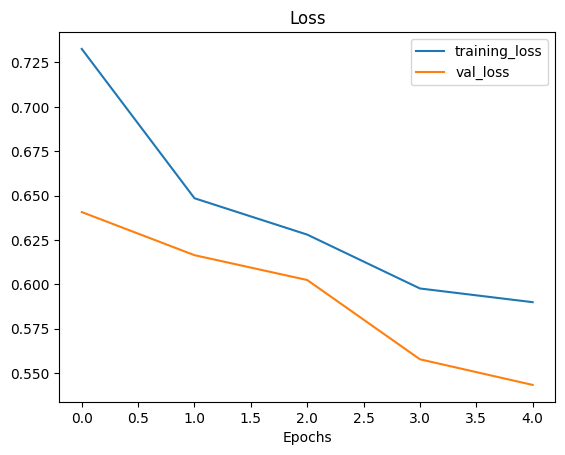

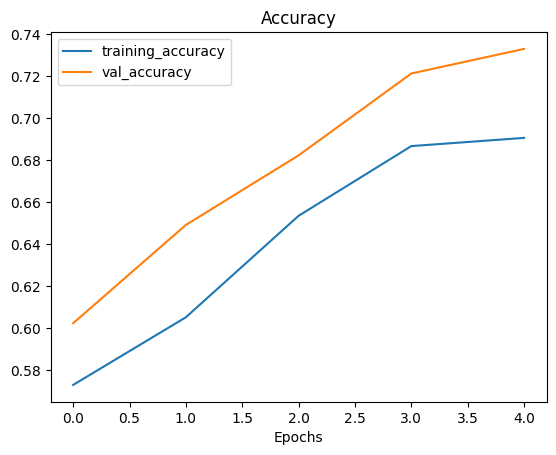

In [61]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

In [62]:
# Classes we're working with
data_dir = pathlib.Path("drive/MyDrive/8th sem project/Detect_solar_dust/Test")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['Clean' 'Dusty']


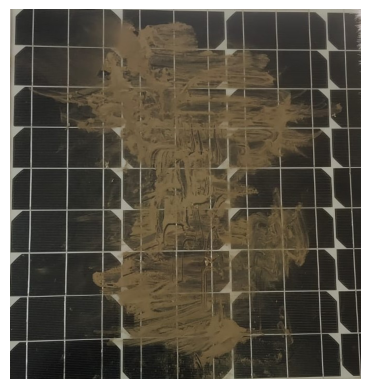

In [63]:
#View our example image
dusty = mpimg.imread("dusty_img.jpg")
plt.imshow(dusty)
plt.axis(False);

In [64]:
# Check the shape of our image
dusty.shape

(712, 675, 3)

In [65]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [66]:

# Load in and preprocess our custom image
dusty = load_and_prep_image("dusty_img.jpg")
dusty

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6113685 , 0.5956822 , 0.5521709 ],
        [0.6073004 , 0.5955357 , 0.53671217],
        [0.64293015, 0.63548094, 0.57652605],
        ...,
        [0.70483196, 0.677381  , 0.64600843],
        [0.7044413 , 0.67699033, 0.65330344],
        [0.73708755, 0.70963657, 0.68610716]],

       [[0.61520654, 0.59952027, 0.55246145],
        [0.5952644 , 0.58349967, 0.52467614],
        [0.63146865, 0.62401944, 0.5650646 ],
        ...,
        [0.6965072 , 0.66905624, 0.6376837 ],
        [0.7205199 , 0.6930689 , 0.6616964 ],
        [0.75634646, 0.7288955 , 0.7053661 ]],

       [[0.6003386 , 0.5846523 , 0.5375935 ],
        [0.58469915, 0.57293445, 0.5141109 ],
        [0.6140292 , 0.60657996, 0.5477424 ],
        ...,
        [0.66296774, 0.63551676, 0.6041442 ],
        [0.7095561 , 0.6821051 , 0.6507326 ],
        [0.7567118 , 0.7292608 , 0.7057314 ]],

       ...,

       [[0.11839435, 0.12228966, 0.10276059],
        [0.11

In [67]:
# Add an extra axis
print(f"Shape before new dimension: {dusty.shape}")
dusty = tf.expand_dims(dusty, axis=0) # add an extra dimension at axis 0
#dusty = dusty[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {dusty.shape}")
dusty

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6113685 , 0.5956822 , 0.5521709 ],
         [0.6073004 , 0.5955357 , 0.53671217],
         [0.64293015, 0.63548094, 0.57652605],
         ...,
         [0.70483196, 0.677381  , 0.64600843],
         [0.7044413 , 0.67699033, 0.65330344],
         [0.73708755, 0.70963657, 0.68610716]],

        [[0.61520654, 0.59952027, 0.55246145],
         [0.5952644 , 0.58349967, 0.52467614],
         [0.63146865, 0.62401944, 0.5650646 ],
         ...,
         [0.6965072 , 0.66905624, 0.6376837 ],
         [0.7205199 , 0.6930689 , 0.6616964 ],
         [0.75634646, 0.7288955 , 0.7053661 ]],

        [[0.6003386 , 0.5846523 , 0.5375935 ],
         [0.58469915, 0.57293445, 0.5141109 ],
         [0.6140292 , 0.60657996, 0.5477424 ],
         ...,
         [0.66296774, 0.63551676, 0.6041442 ],
         [0.7095561 , 0.6821051 , 0.6507326 ],
         [0.7567118 , 0.7292608 , 0.7057314 ]],

        ...,

        [[0.11839435, 0.12228966, 

In [68]:
# Make a prediction on custom image tensor
pred = model_8.predict(dusty)
pred

1/1 [==============================] - 0s 22ms/step


array([[0.6030227]], dtype=float32)

In [69]:
# Remind ourselves of our class names
data_dir = pathlib.Path("drive/MyDrive/8th sem project/Detect_solar_dust/Test")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
cls_name = class_name
print(class_name)

# We can index the predicted class by rounding the prediction probability
pred_class = cls_name[int(tf.round(pred)[0][0])]
pred_class

['Clean' 'Dusty']


'Dusty'

In [70]:
# Importing necessary libraries
import os
import glob

# Set the path to the folder where images are stored
path = '/content/drive/MyDrive/8th sem project/DriveSyncFiles/'

# Get the list of all image files in the folder
files = sorted(glob.glob(os.path.join(path, '*.jpg')))

# Get the last image file from the list
latest_file = files[-1]

# Print the path of the last image file
print('Last image uploaded:', latest_file)


Last image uploaded: /content/drive/MyDrive/8th sem project/DriveSyncFiles/1680683267870.jpg


In [71]:
# Define the path of the folder where images will be uploaded
folder_path = '/content/drive/MyDrive/8th sem project/DriveSyncFiles'

In [72]:
pip install Twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
from twilio.rest import Client
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)

  #  Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  print(pred_class)
  pred_int = float(pred)
  output_message = ''

  if pred_int >= 0.3 and pred_int <= 0.7: output_message = 'Need Dry cleaning'
  elif pred_int > 0.6: output_message = 'Need wet cleaning'
  else: output_message = 'Clean'

  print(output_message)
  
  # Your Account SID and Auth Token from twilio.com/console
  account_sid = 'AC368743a76a26029f693403864ab1ae53'
  auth_token = '2ee76e3ec47df298449d858d3b3c4f12'
  client = Client(account_sid, auth_token)
  # The message you want to send
  message = pred_class + " " + output_message
  # The phone number you want to send the message to
  to_number = '+916353153180'
  # The phone number you want to send the message from
  from_number = '+16076083726'
  # Send the message using the Twilio API
  client.messages.create(body=message , from_=from_number , to=to_number)

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [88]:
# Importing necessary libraries
import os
import glob
import time
# Function to retrieve the last image inserted to the folder
def get_last_uploaded_image():
  # Set the path to the folder where images are stored
  path = '/content/drive/MyDrive/DriveSyncFiles/'

  # Get the list of all image files in the folder
  files = sorted(glob.glob(os.path.join(path, '*.jpg')))

  # Get the last image file from the list
  latest_file = files[-1]

  # Print the path of the last image file
  print('Last image uploaded:', latest_file)
  return latest_file

def run_model_on_last_uploaded_image():
  last_file = get_last_uploaded_image()
  # Test our model on a custom image
  pred_and_plot(model_8, last_file, ['Clean','Dusty'])

# Run the model continuously with a sleep time of 5 seconds to check for the last uploaded image

while True:
  # Get the list of all files in the folder
  file_list = os.listdir(folder_path)
  # Check if any new file has been added since the last iteration
  if len(file_list) > 0:
    # Run the machine learning model on the last uploaded image
    run_model_on_last_uploaded_image()
    plt.show()
    # Wait for 5 seconds before checking for the next uploaded image
    time.sleep(12)

Output hidden; open in https://colab.research.google.com to view.